# MOwNiT 
## Laboratorium 5

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [4]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(Bsmall,1)

2×2 Matrix{Float64}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [5]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [6]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [7]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

5.636e-6

#### Wersja ulepszona

In [8]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2×2 Matrix{Int64}:
 1  2
 3  4

4-element Vector{Int64}:
 1
 3
 2
 4

In [9]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [10]:
@elapsed better_multiplication(Asmall, Bsmall)

0.0302503

#### Wersja BLASowa

In [11]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

#### Porównanie wersji

In [12]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [13]:
@elapsed naive_multiplication(A, B)

2.424646731

In [14]:
@elapsed better_multiplication(A, B)

0.858499923

In [16]:
@elapsed A*B

0.427008158

### Wielomiany i aproksymacja średniokwadratowa

In [17]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

In [21]:
# Przykładowa funkcja, którą będziemy aproksymować
myfun = exp
methods(exp)

# 14 methods for generic function "exp":
[1] exp(x::Union{Float16, Float32, Float64}) in Base.Math at special/exp.jl:326
[2] exp(A::StridedMatrix{var"#s885"} where var"#s885"<:Union{Float32, Float64, ComplexF32, ComplexF64}) in LinearAlgebra at /opt/jupyterhub/kernels/julia-1.8/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:569
[3] exp(A::StridedMatrix{var"#s885"} where var"#s885"<:Union{Integer, Complex{<:Integer}}) in LinearAlgebra at /opt/jupyterhub/kernels/julia-1.8/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:570
[4] exp(A::LinearAlgebra.Transpose{<:Any, <:AbstractMatrix}) in LinearAlgebra at /opt/jupyterhub/kernels/julia-1.8/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:572
[5] exp(J::LinearAlgebra.UniformScaling) in LinearAlgebra at /opt/jupyterhub/kernels/julia-1.8/share/julia/stdlib/v1.8/LinearAlgebra/src/uniformscaling.jl:173
[6] exp(A::LinearAlgebra.Adjoint{<:Any, <:AbstractMatrix}) in LinearAlgebra at /opt/jupyterhub/kernels/julia-1.8/share/julia/stdlib/v1.8/LinearAlgebra/src/dense.jl:571
[7] exp(D::LinearAlgebra.Diagonal) in LinearAlgebra at /opt/jupyterhub/kernels/julia-1.8/share/julia/stdlib/v1.8/LinearAlgebra/src/diagonal.jl:674
[8] exp(A::LinearAlgebra.Hermitian{var"#s884", S} where {var"#s884"<:Complex, S<:(AbstractMatrix{<:var"#s884"})}) in LinearAlgebra at /opt/jupyterhub/kernels/julia-1.8/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:731
[9] exp(A::Union{LinearAlgebra.Hermitian{var"#s885", S}, LinearAlgebra.Symmetric{var"#s885", S}} where {var"#s885"<:Real, S}) in LinearAlgebra at /opt/jupyterhub/kernels/julia-1.8/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:727
[10] exp(x::BigFloat) in Base.MPFR at mpfr.jl:626
[11] exp(x::Real) in Base.Math at math.jl:1369
[12] exp(::Missing) in Base.Math at math.jl:1374
[13] exp(a::ComplexF16) in Base.Math at math.jl:1358
[14] exp(z::Complex) in Base at complex.jl:680

In [22]:
#import Pkg; 
#Pkg.add("Polynomials")

In [23]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.865870849027 + 2905.5721994684864*x - 1082.7457238744705*x^2 + 100.44658880845454*x^3)

In [24]:
typeof(fit_poly_3)

Polynomial{Float64, :x}

In [25]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534434

In [26]:
using Plots

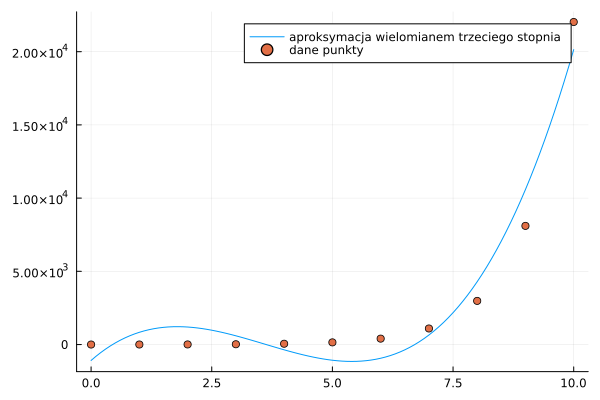

In [27]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Wielomiany Czebyszewa w pakiecie Polynomials

In [28]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1⋅T_2(x))

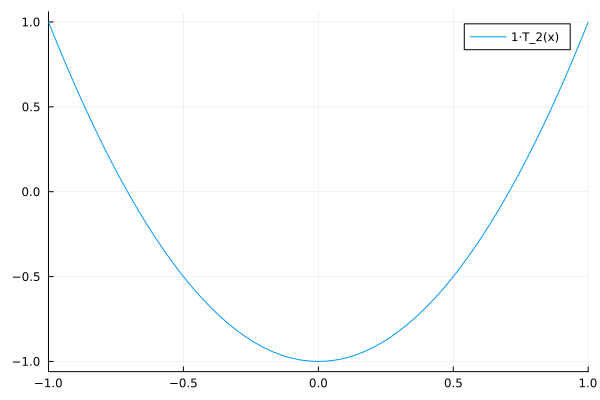

In [29]:
plot(t2)

In [30]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865476

In [31]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1 + 2*x^2)

In [32]:
# można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

In [33]:
convert(Polynomial, kombinacja_T)

Polynomial(2 + 2*x + 2*x^2)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [34]:
#using Pkg;
#Pkg.add("TaylorSeries")

In [35]:
using TaylorSeries

In [36]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [37]:
#Rozwinięcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [38]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [39]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Vector{Float64}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [40]:
# Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [41]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. **(1pkt)** Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. Do analizy danych można użyć wybranego narzędzia (Julia, R)
 
 
2. **(2 pkt)** Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). 
    
    Do analizy danych można użyć wybranego narzędzia (Julia, R)
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 


3. **(1 pkt)** Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. Do analizy danych można użyć wybranego narzędzia (Julia, R)

4. **(1 pkt)** Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. 

5. **(1 pkt)** Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ 
